In [1]:
%load_ext autoreload
%autoreload 2
import BayesRho as BKR
import numpy as np

0.0036953098406349713 [0.9235, 0.0765] Independent


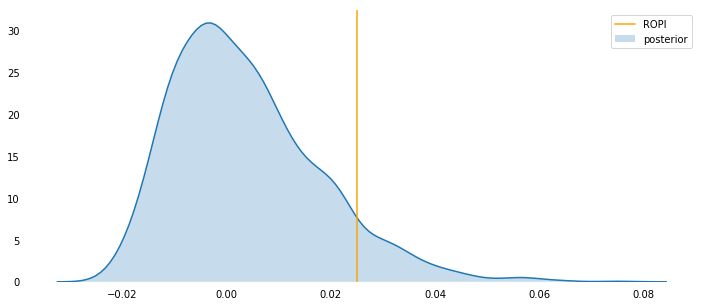

In [17]:
X=np.random.randn(200,1)
Y=np.random.randn(200,1)

BI = BKR.BKR(BKR.rbf,BKR.rbf)#we use two rbf kernels because both X and Y are continuous
meanrho, prob, decision = BI.test(X,Y, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000,  ncomponents = 30)
##INPUTS:
##ROPI defines the region of practical independence ρ < ROPI
#note that under the null P(ρ < 0) =0.5
## probTh: is the threshold for the decision 
# P(ρ > ROPI)>probTh -> dependence
# P(ρ < ROPI)>probTh -> inddependence
# otherwise undecided
##nystrom = True uses the low-rank approximation to be used for "large" datasets
#by default it uses a rank  ncomponents = 30 isntead of n (being the number of observations)
##nsamples: is the number of samples for the posterior
##OUTPUTS
##meanrho the posterior mean of the distance correlation (an estimate of ρ)
##prob: a list [P(ρ < ROPI),P(ρ > ROPI)] 
# decision: see above
print(meanrho, prob, decision )
BI.plot();

([0.0, 1.0], 'Dependent')


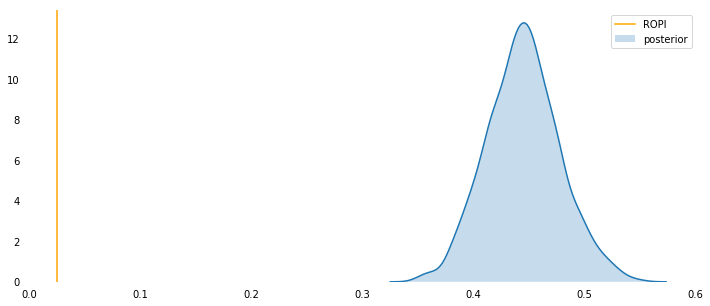

In [3]:
X=np.random.randn(200,1)
Y=X**2

BI = BKR.BKR(BKR.rbf,BKR.rbf)#we use two rbf kernels because both X and Y are continuous
out = BI.test(X,Y, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000)
print(out)
BI.plot();

([0.9875, 0.0125], 'Independent')


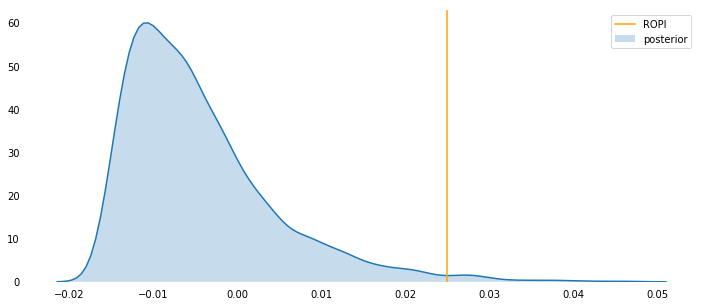

In [11]:
X=np.random.randn(200,1)
Y=np.random.binomial(1,0.5,size=(200,1))

BI = BKR.BKR(BKR.rbf,BKR.CatKern)#we use rbf kernel for X and 'CatKern' for Y (categorical)
out = BI.test(X,Y, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000)
print(out)
BI.plot();

([0.0, 1.0], 'Dependent')


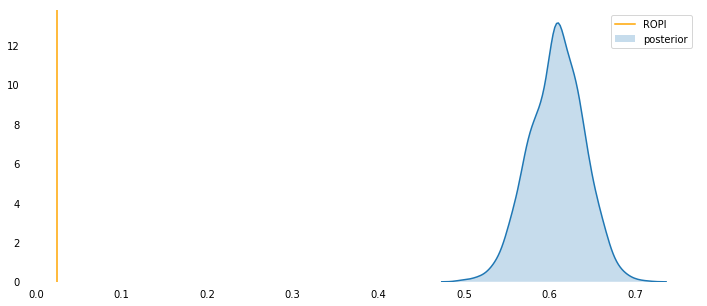

In [13]:
X=np.random.randn(200,1)
Y=(X>0)+0

BI = BKR.BKR(BKR.rbf,BKR.CatKern)#we use rbf kernel for X and 'CatKern' for Y (categorical)
out = BI.test(X,Y, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000)
print(out)
BI.plot();